In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter
import os
import keras

In [ ]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!echo '{"username":"rimasalshehri","key":"936d29f3922a58f667be335b8578cc9e"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 17572 files belonging to 38 classes.


In [ ]:
class_names = training_ds.class_names

## Defining Cnn
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

In [ ]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

retVal = MyCnn.fit(training_ds,validation_data= validation_ds,epochs = 3)

Epoch 1/3
703/703 [==============================] - 196s 261ms/step - loss: 1.1913 - accuracy: 0.6715 - val_loss: 0.5949 - val_accuracy: 0.8131
Epoch 2/3
703/703 [==============================] - 185s 262ms/step - loss: 0.3937 - accuracy: 0.8756 - val_loss: 0.3826 - val_accuracy: 0.8812
Epoch 3/3
703/703 [==============================] - 172s 243ms/step - loss: 0.2227 - accuracy: 0.9280 - val_loss: 0.3845 - val_accuracy: 0.8866


4/4 [==============================] - 1s 78ms/step


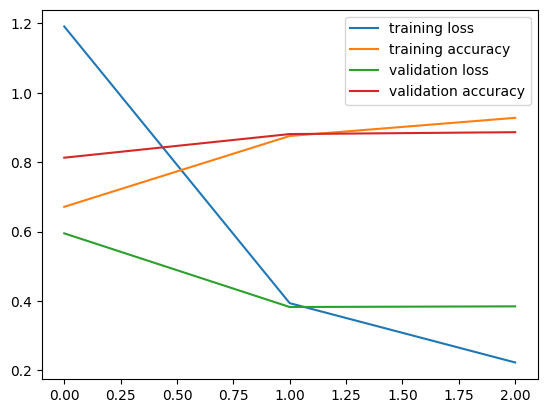

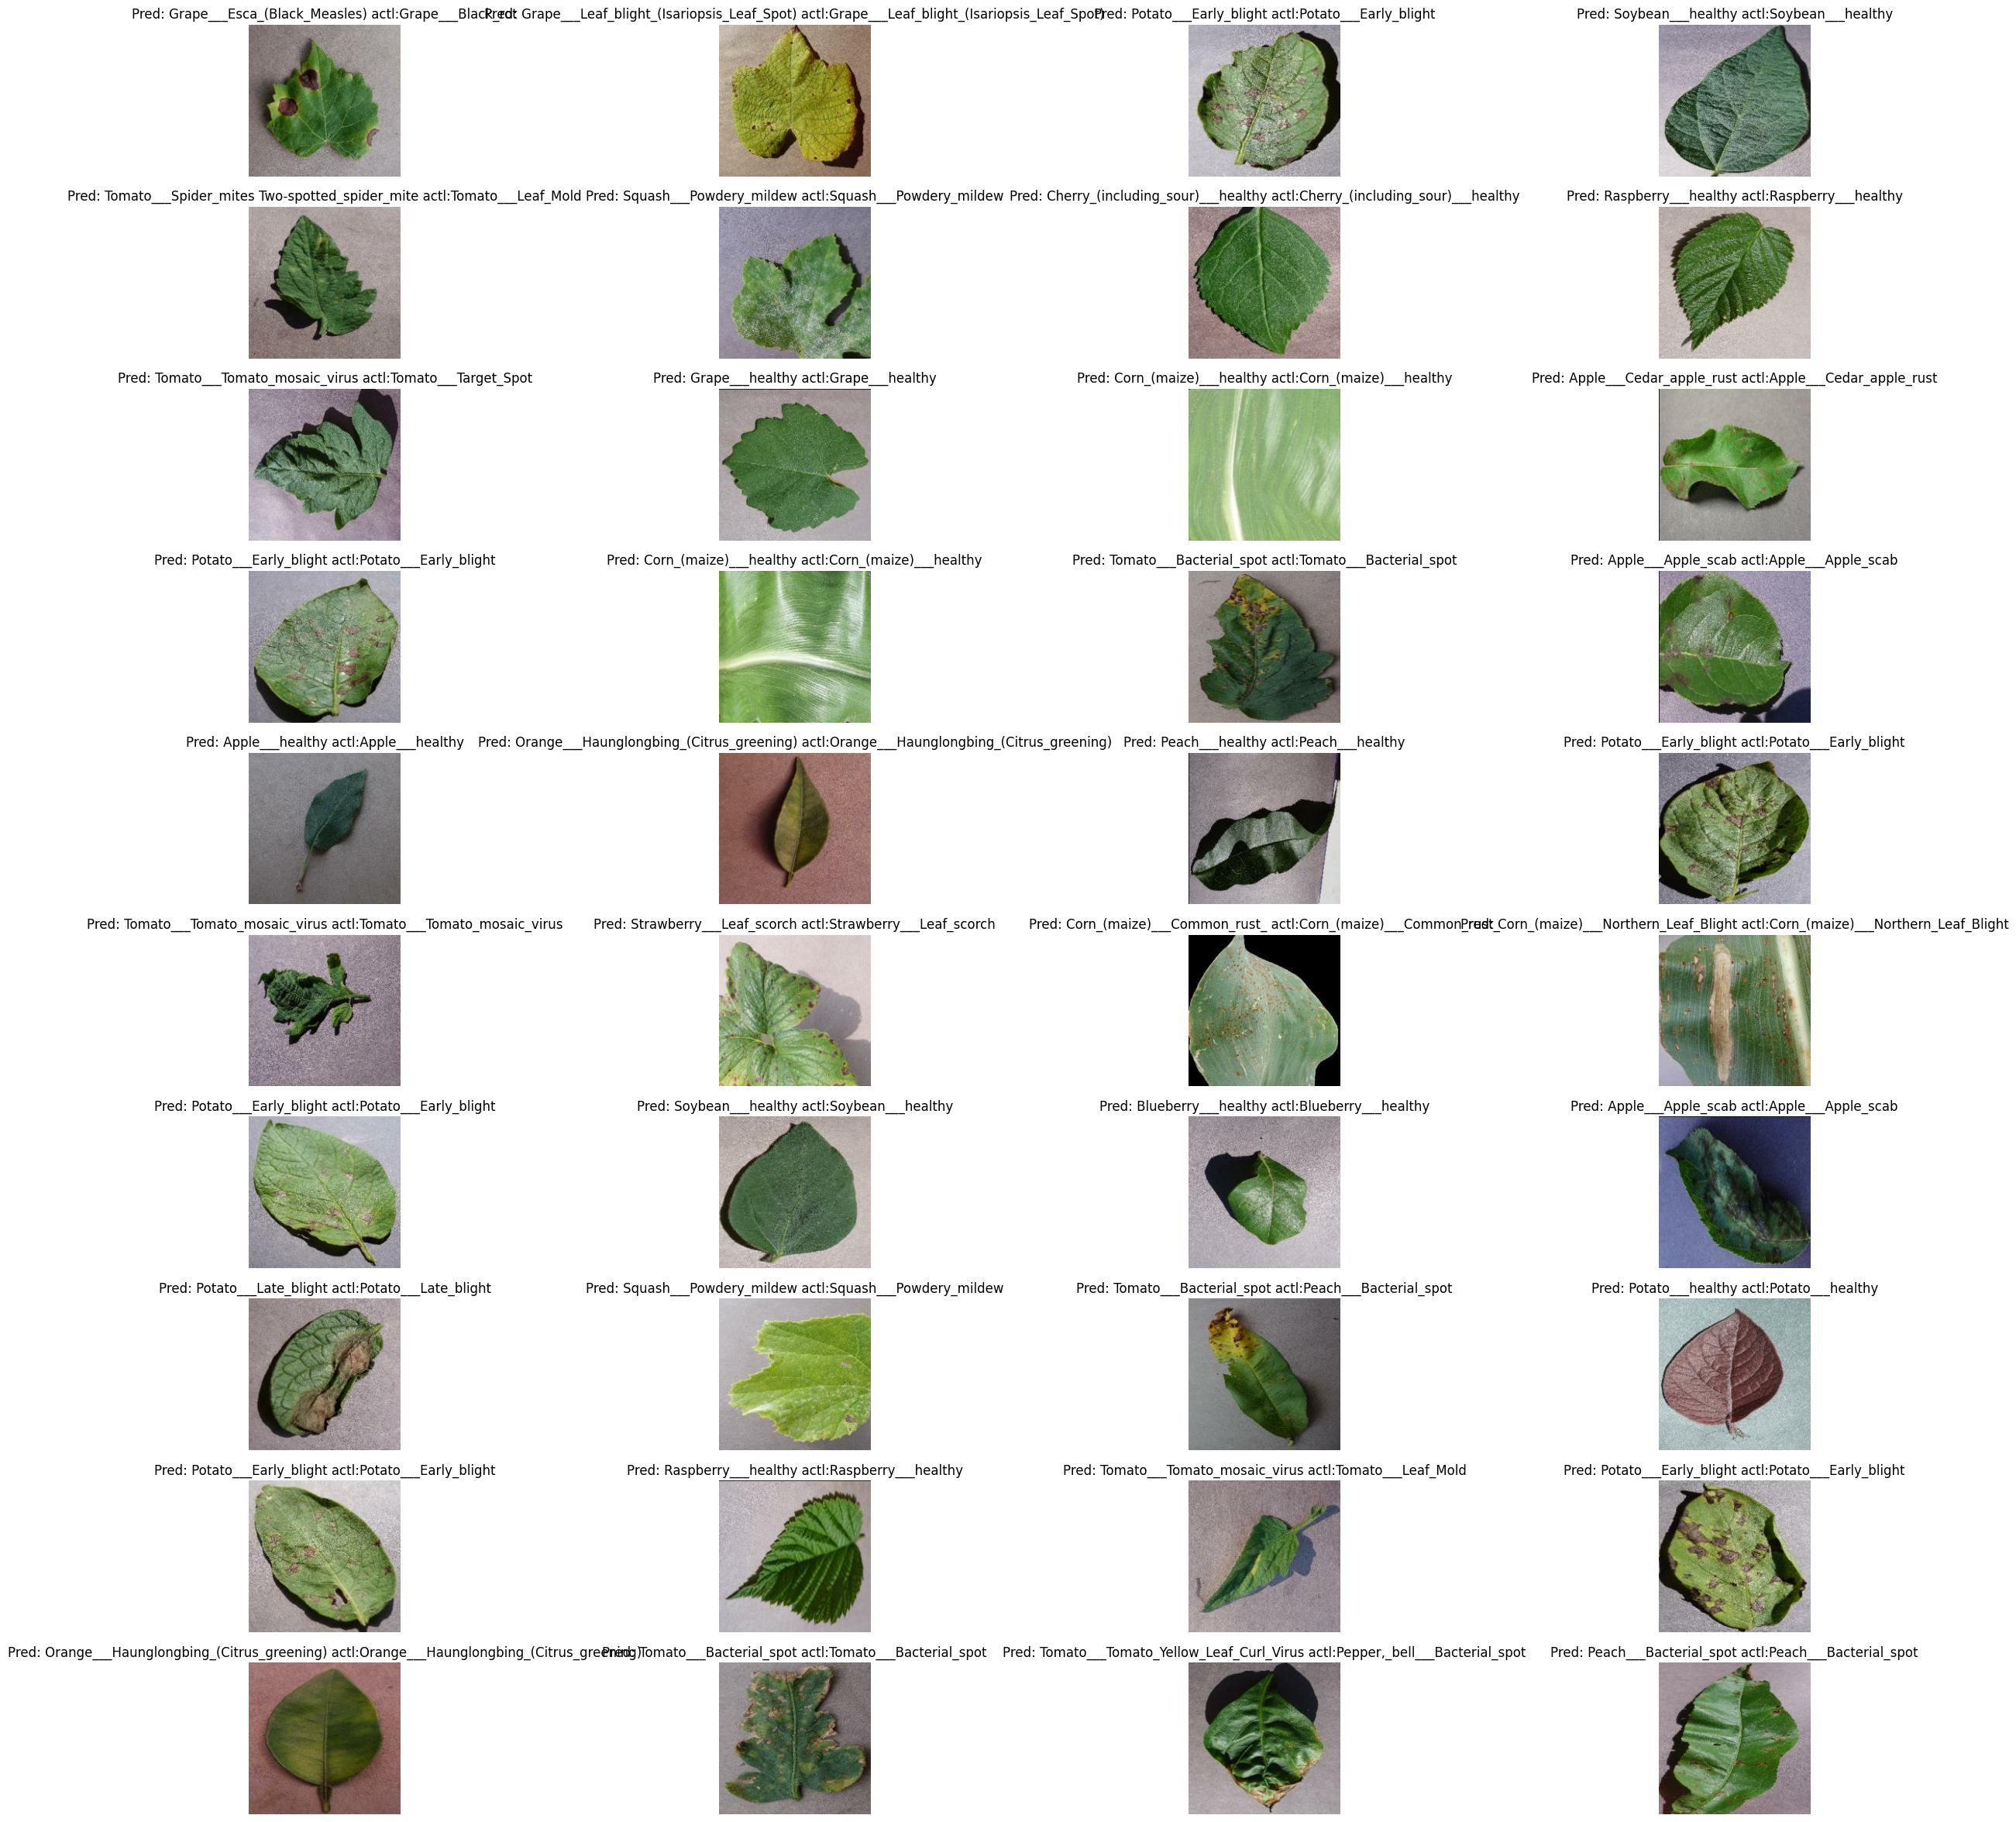

In [ ]:

plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

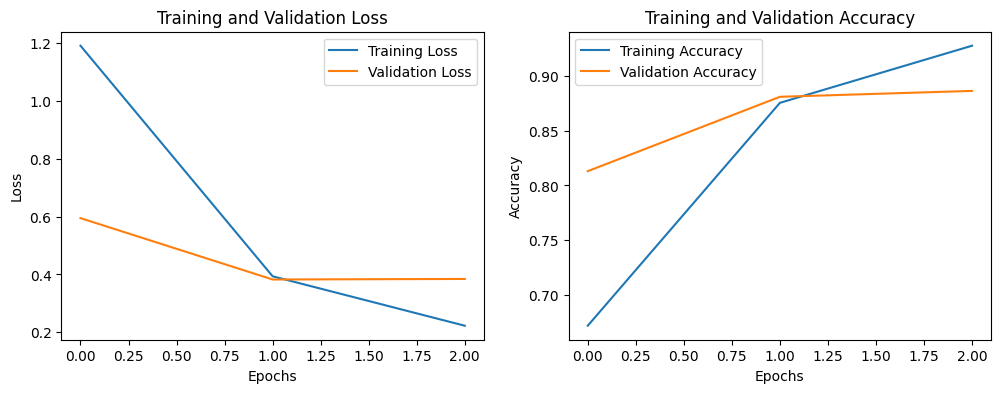

In [13]:
plt.figure(figsize=(12, 4))

# Plot training loss and accuracy
plt.subplot(1, 2, 1)
plt.plot( retVal.history['loss'], label='Training Loss')
plt.plot( retVal.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot( retVal.history['accuracy'], label='Training Accuracy')
plt.plot( retVal.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/test',
    shuffle=False,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

# Evaluate the model on the test set
test_loss, test_accuracy = MyCnn.evaluate(test_ds)

# Print test accuracy
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")

Found 33 files belonging to 1 classes.
1/1 [==============================] - 1s 902ms/step - loss: 16.9301 - accuracy: 0.0303
Accuracy on test data: 3.03%


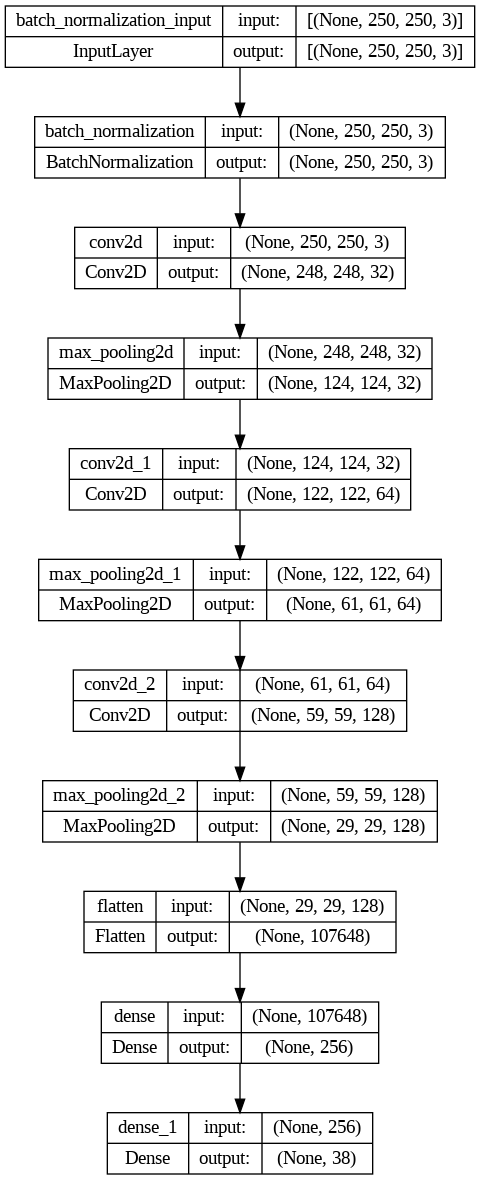

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## The End of the notebook